In [35]:
import tensorflow as tf

In [36]:
x = tf.range(0, 100, 2)

In [37]:
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])>

In [38]:
y = 2*x + 3

In [39]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199])>

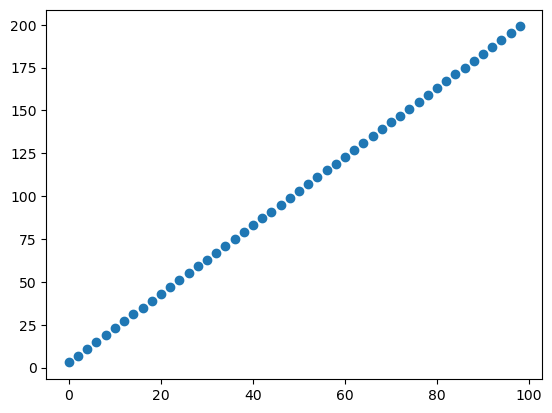

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()


# Model building

In [42]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (1,)),
    tf.keras.layers.Dense(1)
])


# compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.05),
              metrics = ['mae'])

# train the model
model.fit(x,y, epochs = 100)




Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 55.8670 - mae: 55.8670
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 20.0494 - mae: 20.0494
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.9304 - mae: 14.9304
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 19.3998 - mae: 19.3998
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 7.0702 - mae: 7.0702  
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 11.0524 - mae: 11.0524
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 15.5875 - mae: 15.5875
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.2255 - mae: 10.2255
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.6240 - mae: 2.6240
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 6.7769 - mae: 6.7769
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.3448 - mae: 2.3448
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.3438 - mae: 5.3438
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [46]:
import numpy as np
model.predict(np.array([150]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


array([[297.79913]], dtype=float32)

### Save model using SavedModel format

In [52]:
model.save('new_model_1.keras')

### Save model using HDF5 format

In [55]:
model.save('new_model_2.h5')

### load model using saved model format

In [62]:
import tensorflow as tf
new_model_1 = tf.keras.models.load_model('new_model_1.keras') 

In [66]:
import numpy as np
new_model_1.predict(np.array([[150], [-10]]))
.predict(np.array([[150], [-10]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


array([[297.7991  ],
       [-16.621445]], dtype=float32)

In [68]:
new_model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

 ### load model using saved model format

In [73]:
import tensorflow as tf
new_model_2 = tf.keras.models.load_model('new_model_2.h5')

In [77]:
import numpy as np
new_model_2.predict(np.array([[150], [-10]]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


array([[297.7991  ],
       [-16.621445]], dtype=float32)

In [79]:
new_model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)